In [8]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# veri yukleme
veriler = pd.read_csv('veriler/maaslar.csv')
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [9]:
x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
X = x.values
Y = y.values

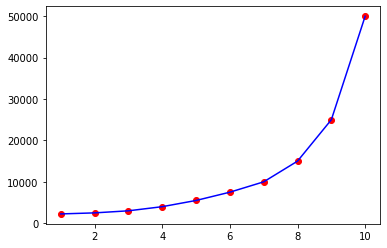

In [13]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0) # "random_state = 0" Tahmin edicinin rastlantısallığını kontrol eder. Özellikler, splitterolarak ayarlanmış olsa bile, her bölünmede her zaman rasgele yerleştirilir.

r_dt.fit(X,Y)

plt.scatter(X,Y, color='red')
plt.plot(x,r_dt.predict(X), color='blue')

In [11]:
# Tahminler

print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

[50000.]
[10000.]


**Gördüğünüz gibi 50000 ile 10000 çıkartı, yani verimizdeki 10'ncu seviyeden sonraki herkesi 50000'e 6'dan 7'ye kadar olan herkesi 10000'e sabitledi.**

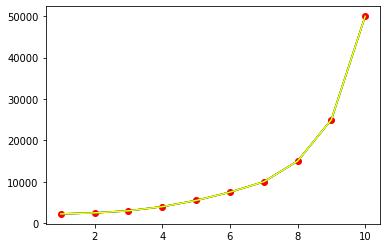

In [15]:
# Şimdi burada X'e 0.5 ekleyip 0.4 çıkartarak tekrardan üstüne çizdirelim.

r_dt.fit(X,Y)
Z = X + 0.5
K = X - 0.4
plt.scatter(X,Y, color='red')
plt.plot(x,r_dt.predict(X), color='blue')

plt.plot(x,r_dt.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')

**3 çizgide aynı noktalardan geçiyor, yani bu 3 değer içinde aynı noktayı buluyorum. Burada bütün değerler aynı gruba indirildi. Belli aralıkta hangi sayı olursa olsun aynı değeri veriyor, bunun nedeni ise decision tree, ağaca koyuyor verileri ve gelmiş olduğu aralığa göre aynı değeri döndürüyor. Yani 2250'den 50000'e kadar olan sayılardan başka bir şeyin çıkma ihtimali yok, tahminler tablodaki sayılardan başka bir sayı olarak karşımıza çıkmıyor.**